## Multi Instrument Plot
This tool downloads and visualizes time-series data of various instruments of a selected spacecraft including solar energetic particle intensities, solar wind plasma and magnetic field data. 

Selected remote-sensing observations such as radio spectrograms or X-ray light curves are also available.

#### Import tools and display options

(note: it's encouraged to first run the notebook with all checkboxes enabled. It's easier to disable unwanted options after loading.)

Energy channel selection: click, hold and drag mouse, or hold Shift and click for range selection, or hold Ctrl/Cmd and click for selecting individual channels.


In [1]:
import os
from multi_inst_plots import multi_inst_plot as m

2025-03-28 13:18:02 - urllib3.connectionpool - WARNING: Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
2025-03-28 13:18:05 - urllib3.connectionpool - WARNING: Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
2025-03-28 13:18:10 - urllib3.connectionpool - WARNING: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='sciqlop.lpp.polytechnique.fr', port=80): Read timed out. (read timeout=1)")': /cache/get_inventory?provider=ssc
2025-03-28 13:18:19 - urllib3.connectionpool -

#### Data directory

Define where to download files. Running this cell will set it to \<current directory\>/data. Setting to None will use sunpy's default data directory. 

In [2]:
m.options.path = f"{os.getcwd()}{os.sep}data"

#### Define plot range (optional)

You can optionally define a smaller plotting range here. Run this whenever start/end dates are changed

In [2]:
display(m.plot_range(m.options.startdate.value, m.options.enddate.value))

#### Load and plot data
Figure and axes are returned for further tweaking capability.

Plotting PSP data for timerange 2022-03-14 00:00:00 - 2022-03-16 00:00:00


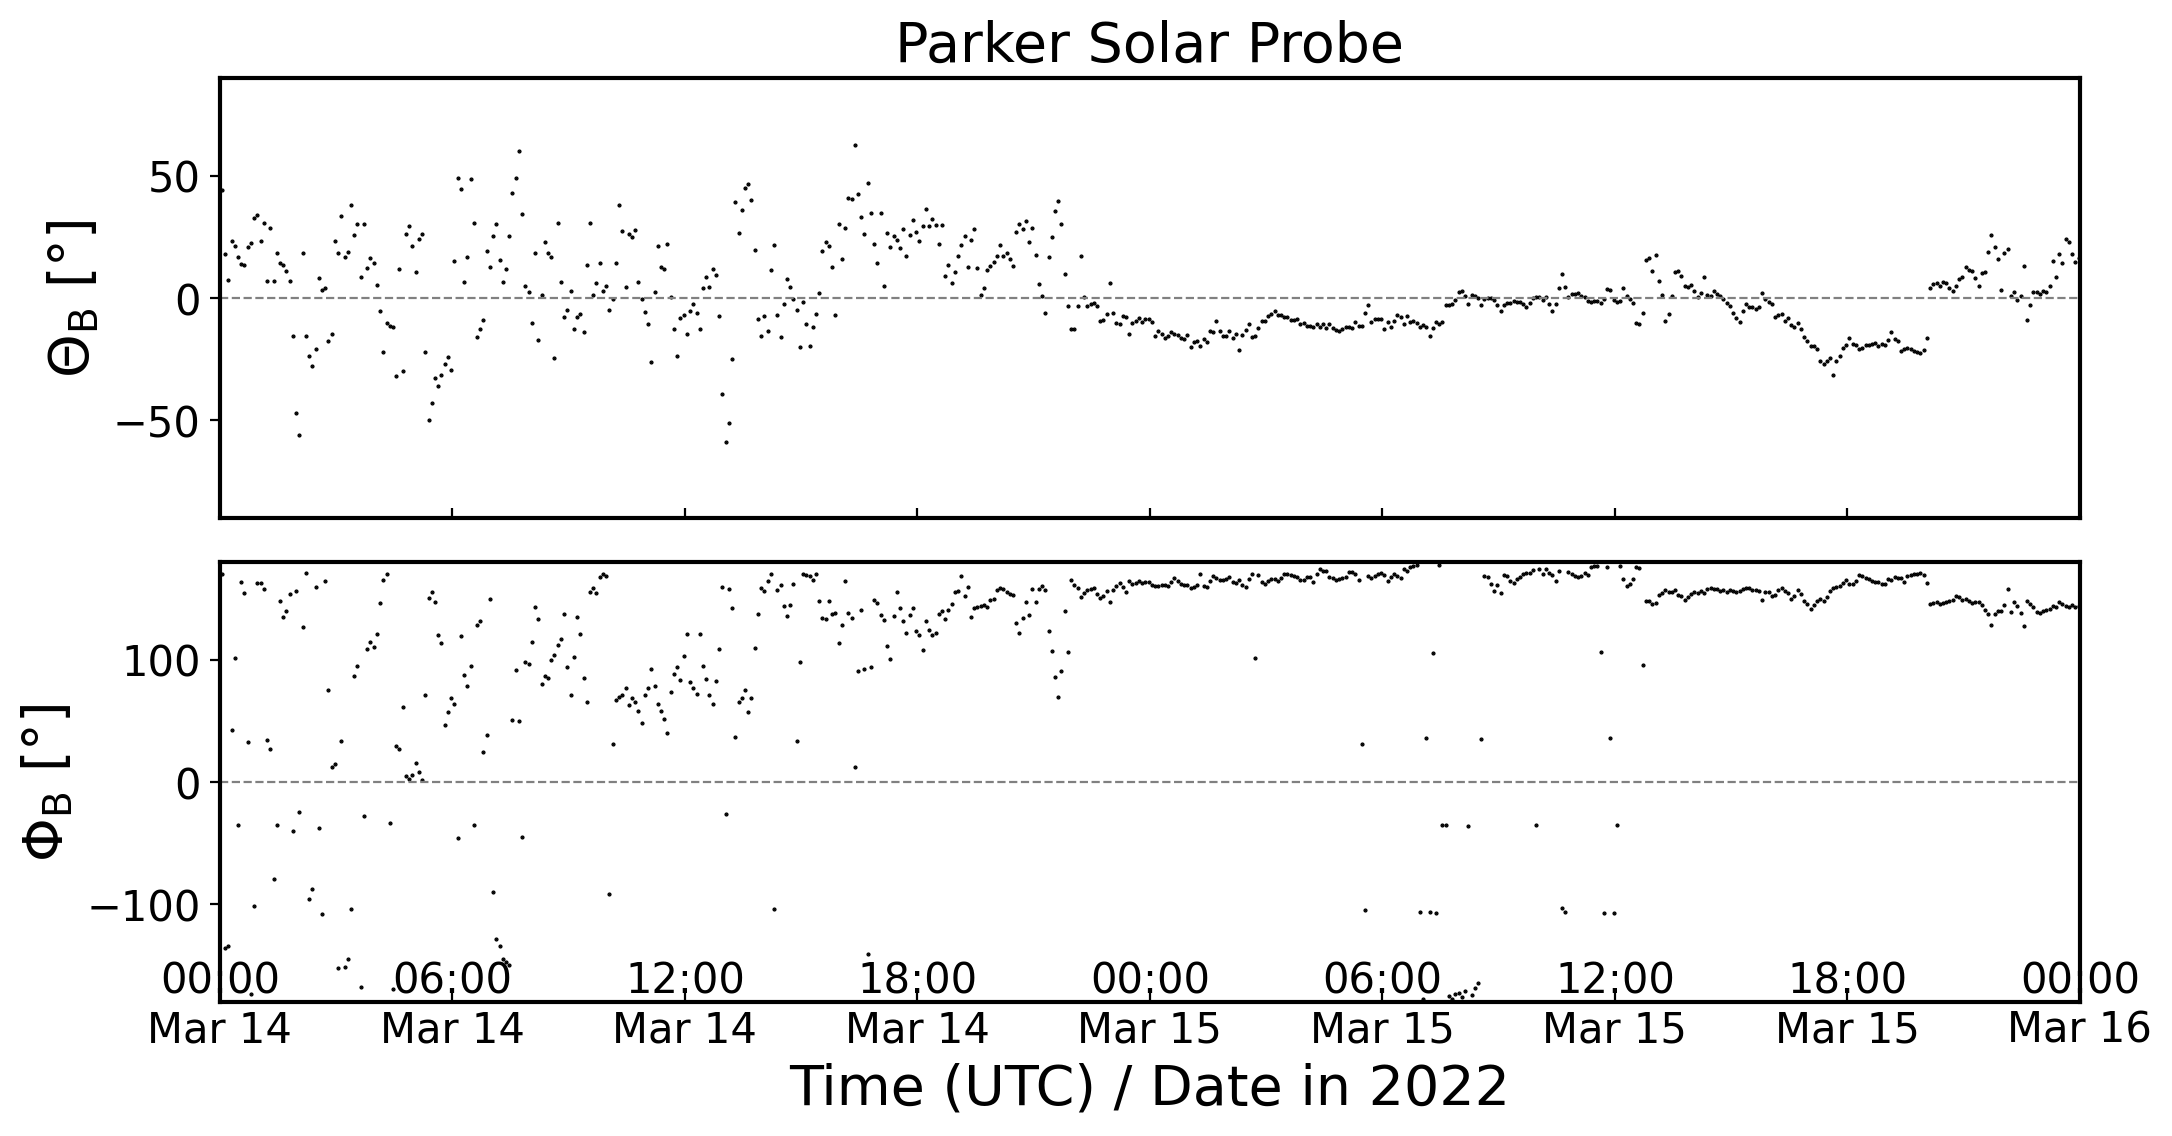

In [5]:
m.load_data()
fig, axs = m.make_plot()

In [ ]:
fig.savefig("SEP_multi-instrument_plot.png")